<a href="https://colab.research.google.com/github/Preetitamrakar-phd/Internship-At-The-Sparks-Foundation-/blob/main/Task1_StudyHoursandScores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
DATA SCIENCE AND BUSINESS ANALYTICS TASK

Preeti Tamrakar

Intern at The Sparks Foundation (TSF)

Task #1: Predict the percentage of an student based on the no. of study hours (Prediction using Supervised ML) 

In [ ]:
#import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
print("The Shape is: ",df.shape) #Shape of the dataset i.e total rows and columns
df.head()


Data imported successfully
The Shape is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.columns                      

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
df.describe()  # Statistical summary

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Now, we will plot our data points on 2-D graph to see our dataset and check if we can manually find any relationship between the data. 

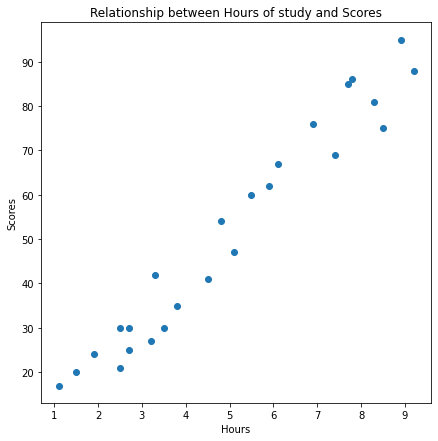

In [ ]:
fig =plt.figure(figsize=(7,7))
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.title('Relationship between Hours of study and Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

It shows positive correlation among the data.

Next step is to divide the dataset into two parts. one is dependent variable i.e. Output and the other is independent variable i.e. Input. 

Then split it into Training and testing dataset.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['Hours']],df['Scores'],test_size = 0.2,random_state=0)

In [ ]:
x_train.shape, y_train.shape

((20, 1), (20,))

In [ ]:
x_test.shape, y_test.shape

((5, 1), (5,))

Importing Linear Regression model

In [ ]:
#Importing linear regression from linear model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
fold = KFold(n_splits=5,random_state=0, shuffle=True)
scores = cross_val_score(LR, x_train, y_train,scoring='r2', cv=fold)
scores.mean()

0.8948738034210176

Train the model

In [ ]:
LR.fit(x_train,y_train)
print("Training complete")


Training complete


Prediction

In [ ]:
result=LR.predict(x_test)
result


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

The sum of absolute differences between our target and predicted variables is called as Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test,result))


Mean Absolute Error: 4.183859899002982


The statistical Measure of how close the data are fitted to regression line is called r2_score


In [ ]:
from sklearn.metrics import r2_score
print("r2_score:",r2_score(y_test,result))

r2_score: 0.9454906892105354


Plotting the regression line

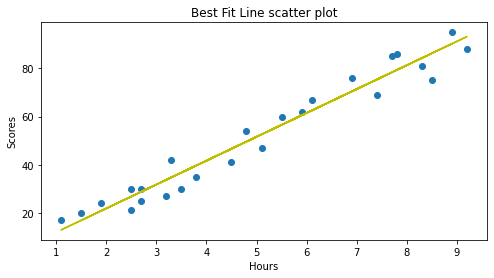

In [ ]:
y=LR.coef_*df[['Hours']]+LR.intercept_   #Y=mx+c
figure = plt.figure(figsize=(8,4))
plt.scatter(df['Hours'],df['Scores'])
plt.plot(df['Hours'],y,'y')                       #plotting Best fit Line whereas Y is straight line
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title("Best Fit Line scatter plot")
plt.show()

comparing  actual and predicted values

In [ ]:
comp=pd.DataFrame({'Actual':y_test,'Predicted':result})
comp

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


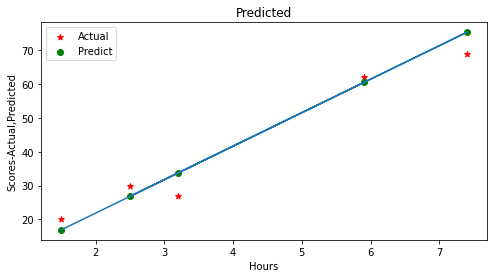

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(x_test,y_test,c='red',marker='*',label='Actual')      #Scatter plot using Test Data(x and y)
plt.scatter(x_test,result,c='green',label='Predict')              #Scatter plot using Data(x and predicted_result)
plt.plot(x_test,result)                                           #plotting the Line(x and predicted_result)
plt.xlabel('Hours')
plt.ylabel('Scores-Actual,Predicted')
plt.title('Predicted')
plt.legend()

Given task is:-  What will be predicted score if a student studies for 9.25 hrs/day

In [ ]:
print("Student studied 9.25Hours per day will get {} Score".format(LR.predict(np.array(9.25).reshape(1,1))))


Student studied 9.25Hours per day will get [93.69173249] Score
